# Clase asincrónica 4

**Nota**: Este notebook contiene el código utilizado para demostrar los temas de la clase 4.
Como siempre, si lo ejecutás o modificás, recomendamos que hagas una copia ("_save as_" con otro nombre) para de esa manera evitar errores de `git` al hacer `pull`'s desde GitHub en el futuro.

## 1. Pandas (continuación)

In [1]:
import pandas as pd
import numpy as np

Creamos un DataFrame sintético usando un diccionario. Inicialmente contendrá una sola llamada `media`, con 1000 `0`'s, 1000 `1`'s y 100 `2`'s.

In [2]:
# Definimos el contenido de una columna como una lista
# ¿Recuerdan el efecto de multiplicar una lista por un número entero?
columna = [0]*1000 + [1]*1000 + [2]*100

In [3]:
df = pd.DataFrame(data={"media": columna})

Luego, creamos una nueva columna llamada `x`, que va a ser una instancia de una variable aleatoria $N(\mu,1)$, donde $\mu$ es el valor de la columna `media` en cada caso. Para eso usamos la función `np.random.randn` de NumPy (junto con el método `assign` de `Pandas` para agregar la columna a `df`):

In [4]:
df = df.assign(x=lambda df: df.media + np.random.randn(df.shape[0]))

In [5]:
df

,media,x
0,0,0.454745
1,0,-1.084452
2,0,-1.946404
3,0,1.704021
4,0,-0.494232
...,...,...
2095,2,1.718330
2096,2,3.189244
2097,2,1.779481
2098,2,1.819608


Creamos una nueva columna, que resulta de estandarizar la variable `x` usando la media y la desviación estándar _de cada grupo_ (definido por la columna `media`):

In [6]:
col_std = df.groupby("media").transform(lambda df: df - df.mean()/df.std()).rename(columns={"x":"t"})

In [7]:
df = df.assign(t=col_std)
df

,media,x,t
0,0,0.454745,0.442163
1,0,-1.084452,-1.097034
2,0,-1.946404,-1.958986
3,0,1.704021,1.691439
4,0,-0.494232,-0.506814
...,...,...,...
2095,2,1.718330,-0.515668
2096,2,3.189244,0.955246
2097,2,1.779481,-0.454517
2098,2,1.819608,-0.414390


Examinemos ahora la media de cada columna:

In [8]:
df.groupby(by="media").agg("mean")

,x,t
media,,
0,0.012592,0.000010
1,1.026640,-0.011473
2,2.151260,-0.082738


Filtremos los grupos con menos de 500 observaciones:

In [9]:
df.groupby(by="media").filter(lambda x: len(x) >= 500)

,media,x,t
0,0,0.454745,0.442163
1,0,-1.084452,-1.097034
2,0,-1.946404,-1.958986
3,0,1.704021,1.691439
4,0,-0.494232,-0.506814
...,...,...,...
1995,1,1.877665,0.839552
1996,1,0.367017,-0.671097
1997,1,0.798017,-0.240097
1998,1,2.361276,1.323163


In [10]:
df.groupby(by="media").filter(lambda x: len(x) < 500)

,media,x,t
2000,2,3.542278,1.308280
2001,2,2.259179,0.025181
2002,2,1.409796,-0.824202
2003,2,3.636433,1.402435
2004,2,2.660241,0.426243
...,...,...,...
2095,2,1.718330,-0.515668
2096,2,3.189244,0.955246
2097,2,1.779481,-0.454517
2098,2,1.819608,-0.414390


## 2. Visualización con `seaborn`

In [11]:
import seaborn as sns

Bajemos el dataset `tips` que viene con `seaborn`:

In [12]:
propinas_df = sns.load_dataset("tips")

In [13]:
type(propinas_df)

pandas.core.frame.DataFrame

In [14]:
propinas_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Seleccionemos el tema que va a tener gráfico:

In [15]:
# sns.set_theme() # tema por defecto
sns.set_theme(style="whitegrid", palette="pastel")

y hagamos un scatterplot

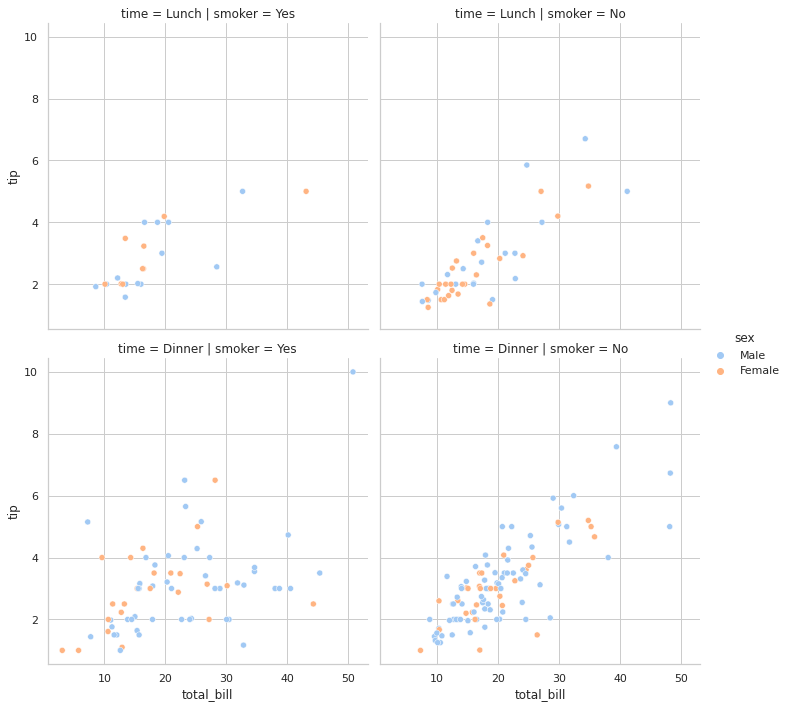

In [16]:
sns.relplot(
    data=propinas_df, 
    x="total_bill", y="tip", 
    hue="sex", row="time", col="smoker"
);

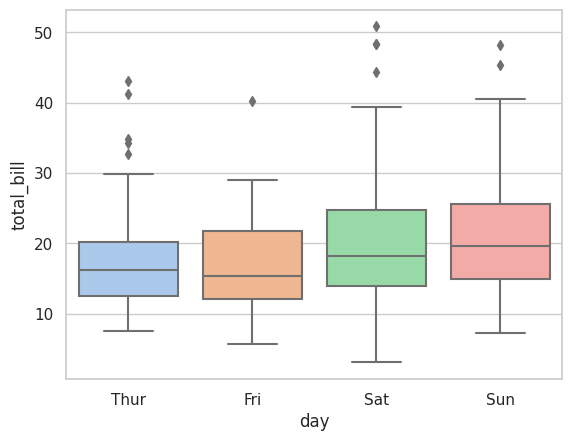

In [17]:
sns.boxplot(
    data=propinas_df,
    x="day", y="total_bill"
);

Ahora hagamos un `boxplot` para mostrar la distribución de los cocientes propina/cuenta para cada día de la semana (se usa un `boxplot` porque el día de la semana es una variable categórica):

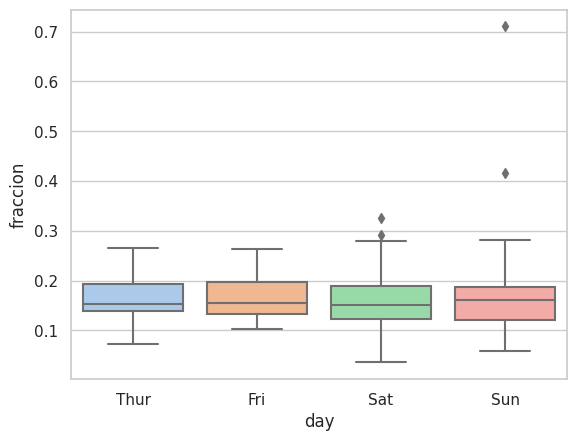

In [18]:
sns.boxplot(
    data=propinas_df.\
      assign(fraccion=lambda df: df.tip / df.total_bill), 
    x="day", y="fraccion"
);

## 3.1 Expresiones regulares

### Ejemplos de expresiones regulares sencillas

In [19]:
import re

Definimos una frase adonde vamos a buscar cierto texto:

In [20]:
frase = "¿Dónde va Vicente? Donde va la gente."

Probemos con una secuencia fija de caracteres

In [21]:
regex = "ente"
regex = re.compile(regex)

El método `search` devuelve un objecto `re.Match` correspondiente a la primera ocurrencia de la expresión regular en el texto

In [22]:
regex.search(frase)

<re.Match object; span=(13, 17), match='ente'>

El método `findall` devuelve una lista con todos los strings que satisfacen la expresión regular en el texto (excluyendo posiblemente strings que se superponen):

In [23]:
regex.findall(frase)

['ente', 'ente']

El método `finditer` devuelve un iterador que permite iterar sobre todos los matches que hay en el texto:

In [24]:
regex.finditer(frase)

Para acceder a cada elemento podemos usar un loop `for` de la misma que haríamos para iterar sobre, por ejempo, una lista:

In [25]:
for match in regex.finditer(frase):
    print(match)

<re.Match object; span=(13, 17), match='ente'>
<re.Match object; span=(32, 36), match='ente'>


### Conjuntos de caracteres con `[...]`

In [26]:
regex2 = "D[oó]nde"
regex2 = re.compile(regex2)
regex2.findall(frase)

for match in regex2.finditer(frase):
    print(match)

<re.Match object; span=(1, 6), match='Dónde'>
<re.Match object; span=(19, 24), match='Donde'>


`[^...]` excluye el conjunto de caracteres `...`:

In [27]:
regex3 = "[^c]ente"
regex3 = re.compile(regex3)
regex3.findall(frase)

['gente']

In [28]:
frase2 = "¿Dónde va Vicente? Donde va la gente. ¿Por qué? Porque es un ente."

`\w` representa un "carácter de palabra" (un número o letra).

El cuantificador `+` colocado después de un carácter significa que el carácter puede aparecer una o más veces:

In [29]:
regex4 = "\w+ente"
regex4 = re.compile(regex4)
regex4.findall(frase2)

['Vicente', 'gente']

El cuantificador `*` colocado después de un carácter significa que el carácter puede no aparecer o aparecer un número indefinido de veces:

In [30]:
regex5 = "\w*ente"
regex5 = re.compile(regex4)
regex5.findall(frase2)

['Vicente', 'gente']

`regex1|regex2` matchea un `string` si `regex1` o `regex2` matchea con el `string`:

In [31]:
regex6 = "\w*ente|D[oó]nde"
regex6 = re.compile(regex5)
regex6.findall(frase2)

['Vicente', 'gente']

In [32]:
for match in regex6.finditer(frase):
    print(match)

<re.Match object; span=(10, 17), match='Vicente'>
<re.Match object; span=(31, 36), match='gente'>


### Parseando el Martín Fierro

In [33]:
with open("archivos/martin_fierro.txt", encoding='utf8') as archivo:
    martin_fierro = archivo.read()

(Esto es equivalente a:
```
archivo = open("Material para videos/martin_fierro.txt")
martin_fierro = archivo.read()
archivo.close()
```
)

In [34]:
# Examinamos el contenido del archivo
print(martin_fierro)

The Project Gutenberg EBook of El Gaucho Martín Fierro, by José Hernández

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: El Gaucho Martín Fierro

Author: José Hernández

Release Date: January 23, 2005 [EBook #14765]

Language: Spanish


*** START OF THIS PROJECT GUTENBERG EBOOK EL GAUCHO MARTIN FIERRO ***




Produced by La Biblioteca Digital Argentina, formatted by Mariano
Cecowski Palacio.







El Gaucho Martín Fierro

de José Hernández


Buenos Aires,
Imprenta de La Pampa,
Victoria 79.

1872.




Carta del Autor a don José Zoilo Miguens

Querido amigo:

Al fin me he decidido a que mi pobre "MARTÍN FIERRO", que me ha ayudado
algunos momentos a alejar al fastidio de la vida del hotel, salga a
conocer el mundo, y allá va acogido al amparo de su nombre.

No le niegue su protec

El texto tiene 12 partes. Cada parte tiene varias estrofas, y cada estrofa tiene 6 versos. La estructura que queremos es una lista anidada:
```
versos = [ parte_1, parte_2, ..., parte_12 ]
versos[n] = [ estrofa_n1, estrofa_n2, ...]
versos[n][m] = [ verso_nm1, verso_nm2, ..., verso_nm6]
versos[n][m][l] = verso_nml
```

In [35]:
partes = re.split("[IVX]+ - .*\n", martin_fierro)

In [36]:
print("La variable \"partes\" es de tipo", type(partes))
partes.pop(0)
print("La variable \"partes\" tiene ahora", len(partes), "elementos")
print("Cada elemento de \"partes\" es de tipo", type(partes[0])) 

La variable "partes" es de tipo <class 'list'>
La variable "partes" tiene ahora 12 elementos
Cada elemento de "partes" es de tipo <class 'str'>


Partimos el contenido de cada parte en estrofas:

In [37]:
estrofas = partes.copy()

In [38]:
for i in range(len(estrofas)):
    estrofas[i] = re.split("\n\d+\n", estrofas[i])
    estrofas[i].pop(0)

In [39]:
versos = estrofas.copy()
for i in range(len(versos)):
    for j in range(len(versos[i])):
        versos[i][j] = versos[i][j].split("\n")
        del versos[i][j][-1] # Agregué esto para eliminar el string vacío al final de cada estrofa


In [40]:
# La primera estrofa (de la primera parte)
versos[0][0]

['Aquí me pongo a cantar',
 'Al compás de la vigüela,',
 'Que el hombre que lo desvela',
 'Una pena estraordinaria',
 'Como la ave solitaria',
 'Con el cantar se consuela.']

In [41]:
for parte in versos:
    for estrofa in parte:
        for verso in estrofa:
            print(re.findall("^\w+|\w+[.,;:]?$", verso))

['Aquí', 'cantar']
['Al', 'vigüela,']
['Que', 'desvela']
['Una', 'estraordinaria']
['Como', 'solitaria']
['Con', 'consuela.']
['Pido', 'Cielo']
['Que', 'pensamiento;']
['Les', 'momento']
['Que', 'historia']
['Me', 'memoria']
['Y', 'entendimiento.']
['Vengan', 'milagrosos,']
['Vengan', 'ayuda,']
['Que', 'añuda']
['Y', 'vista;']
['Pido', 'asista']
['En', 'ruda.']
['Yo', 'cantores,']
['Con', 'obtenidas,']
['Y', 'adquiridas']
['No', 'sustentar']
['Parece', 'largar']
['se', 'partidas']
['Mas', 'pasa']
['Martín', 'pasar;']
['nada', 'recular']
['ni', 'espantan,']
['y', 'cantan']
['yo', 'cantar.']
['Cantando', 'morir']
['Cantando', 'enterrar,']
['Y', 'llegar']
['Al', 'padre:']
['Dende', 'madre']
['Vine', 'cantar.']
['Que', 'lengua']
['Ni', 'palabra:']
['El', 'labra']
['Y', 'cantar,']
['Cantando', 'encontrar']
['Aunque', 'abra.']
['Me', 'bajo']
['A', 'argumento:']
['Como', 'viento']
['Hago', 'pastos;']
['Con', 'bastos']
['Juega', 'pensamiento.']
['Yo', 'letrao,']
['Mas', 'cantar']
['No', 'acaba

## 4. Widgets en Jupyter

In [42]:
import ipywidgets as widgets

### Creemos un widget de barra deslizante

In [43]:
w = widgets.IntSlider(min=0, max=10)
display(w)

IntSlider(value=0, max=10)

In [57]:
w.value

5

### Creemos un widget de área de texto

In [53]:
w2 = widgets.Textarea()
display(w2)

Textarea(value='')

In [56]:
w2.value

'sdfgdhfh'

### Creemos un widget de barra deslizante _reactivo_

In [47]:
from ipywidgets import interact

In [48]:
def f(x):
    print(x)

In [52]:
interact(f, x=widgets.IntSlider(min=0,max=10));

interactive(children=(IntSlider(value=0, description='x', max=10), Output()), _dom_classes=('widget-interact',…

### Creemos un widget de menú tipo dropdown para modificar un plot reactivamente

Vamos a hacer un widget que elija la columna del DataFrame `propinas_df` en base a la cual asignar el color de los puntos del scatter plot.

In [51]:
def g(x):
    sns.set_theme()
    pp = sns.relplot(
        data = propinas_df,
        x="total_bill",
        y="tip", hue=x
    )
    pp
    
interact(g, x=widgets.Dropdown(options=["smoker", "sex", "time"]));

interactive(children=(Dropdown(description='x', options=('smoker', 'sex', 'time'), value='smoker'), Output()),…